In [1]:
import matplotlib
import matplotlib.pyplot as plt
import metpy.calc as mpcalc
from metpy.units import units
import numpy as np

%matplotlib inline

In [2]:
lats = np.arange(-90,91) * units.degrees
coriolis = mpcalc.coriolis_parameter(lats)

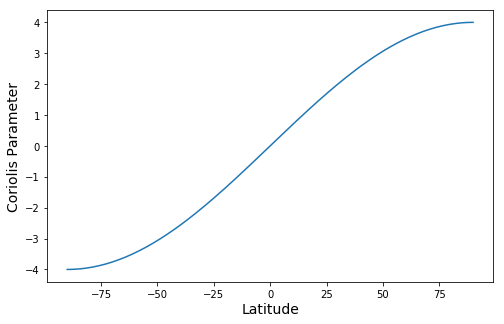

In [3]:
fig = plt.figure(figsize=(8, 5))
ax = plt.subplot(1, 1, 1)
ax.plot(lats, coriolis)
ax.set_xlabel('Latitude', fontsize=14)
ax.set_ylabel('Coriolis Parameter', fontsize=14)

In [4]:
from cartopy.util import add_cyclic_point

lons = np.arange(0,360)

coriolis = np.ones((181,360)) * coriolis[:, np.newaxis]

cyclic_data, cyclic_lons = add_cyclic_point(coriolis, coord=lons)

<a list of 19 text.Text objects>

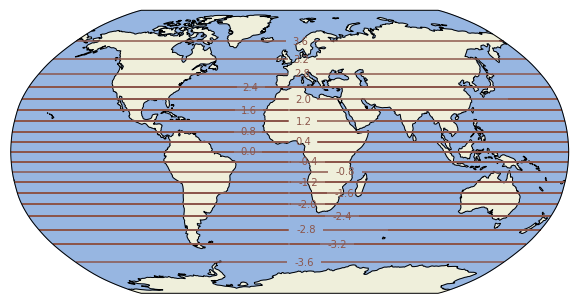

In [5]:
# Importing CartoPy
import cartopy.crs as ccrs

# import cartopy's collection of map features
import cartopy.feature as cfeat

# Works with matplotlib's built-in transform support.
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())

# Sets the extent to cover the whole globe
ax.set_global()

# Add variety of features
ax.add_feature(cfeat.LAND)
ax.add_feature(cfeat.OCEAN)
ax.add_feature(cfeat.COASTLINE)

# Set negative contours to be solid instead of dashed
matplotlib.rcParams['contour.negative_linestyle'] = 'solid'
CS = ax.contour(cyclic_lons, lats, cyclic_data, 20, colors='tab:brown', transform=ccrs.PlateCarree())
ax.clabel(CS, inline=1, fontsize=10, fmt='%1.1f')